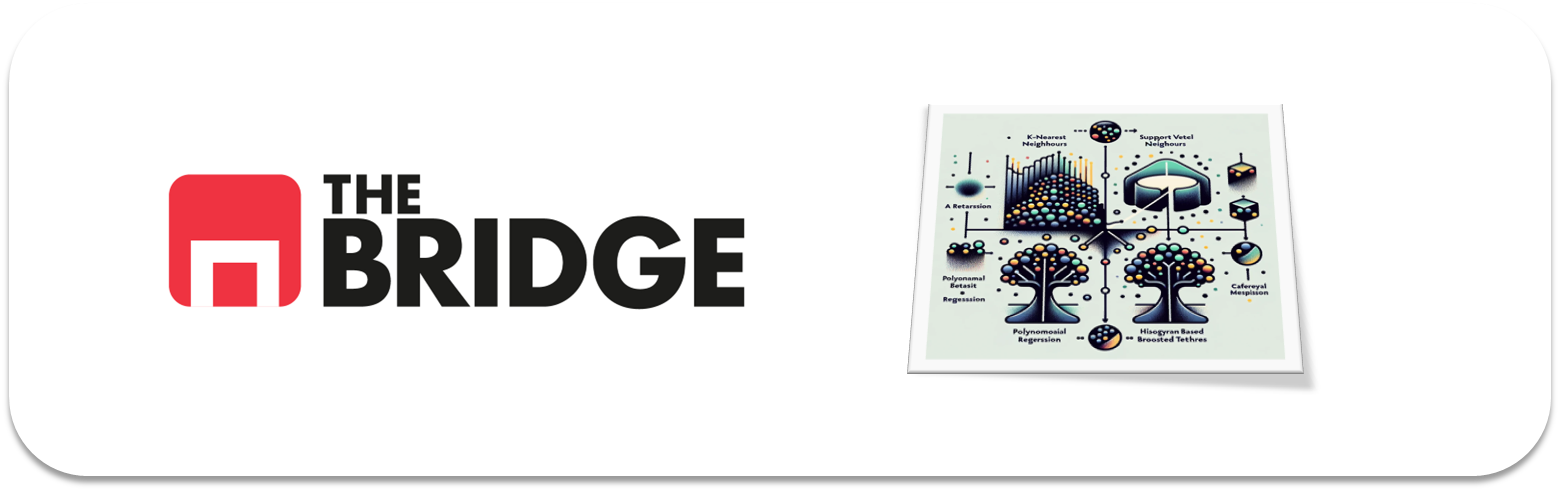

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [200]:
import numpy as np
import pandas as pd

from bootcampviztools import *

from scipy.stats import chi2_contingency

from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from toolbox_ML import *

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [154]:
df_credit = pd.read_csv('./data/credit_npo.csv')

In [155]:
# Echo un vistazo al DF
df_credit.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [156]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

*Se puede observar que hay nulos en dos variables, `MonthlyIncome` y `NumberOfDependents`. De momento no las tocamos ya que estamos en el DF original*

In [157]:
describe_df(df_credit)

,COL_N,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,DATA_TYPE,int64,float64,int64,int64,float64,float64,int64,int64,int64,int64,float64
1,MISSINGS (%),0.0,0.0,0.0,0.0,0.0,5.750977,0.0,0.0,0.0,0.0,1.411821
2,UNIQUE_VALUES,2,10764,78,10,11547,4168,43,13,16,8,11
3,CARDIN (%),0.02,85.86,0.62,0.08,92.1,33.24,0.34,0.1,0.13,0.06,0.08


*En esta tabla puedo ver que hay varias variables que son numéricas discretas, pero mejor las voy a tipificar a raíz de estos datos*

In [158]:
tipificacion = tipifica_variables(df_credit, 5, 20.0)
tipificacion

,nombre_variable,tipo_sugerido
0,SeriousDlqin2yrs,Binaria
1,RevolvingUtilizationOfUnsecuredLines,Numérica Continua
2,age,Numérica Discreta
3,NumberOfTime30-59DaysPastDueNotWorse,Numérica Discreta
4,DebtRatio,Numérica Continua
5,MonthlyIncome,Numérica Continua
6,NumberOfOpenCreditLinesAndLoans,Numérica Discreta
7,NumberOfTimes90DaysLate,Numérica Discreta
8,NumberRealEstateLoansOrLines,Numérica Discreta
9,NumberOfTime60-89DaysPastDueNotWorse,Numérica Discreta


*A simple vista, no hay ninguna variable categórica salvo la **Target** (`SeriousDlqin2yrs`) que es binaria, la gran mayoría son numéricas discretas. Por lo tanto, vamos a separar las **Features** y la **Target***

In [159]:
target = 'SeriousDlqin2yrs'
features = [col for col in df_credit.columns if col != target]
features

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

*La variable **Target**, como hemos creado antes, es `SeriousDlqin2yrs`*.

*Estamos ante un problema de clasificación donde debemos predecir si una persona va a encontrar dificultades financieras en los próximos dos años teniendo en cuenta una serie de características*.

### #1.3
Pinta la distribución de frecuencias del target y coméntala

In [160]:
# Primero divido el DF en TRAIN y TEST

train_set, test_set = train_test_split(df_credit, test_size=0.2, random_state=43)

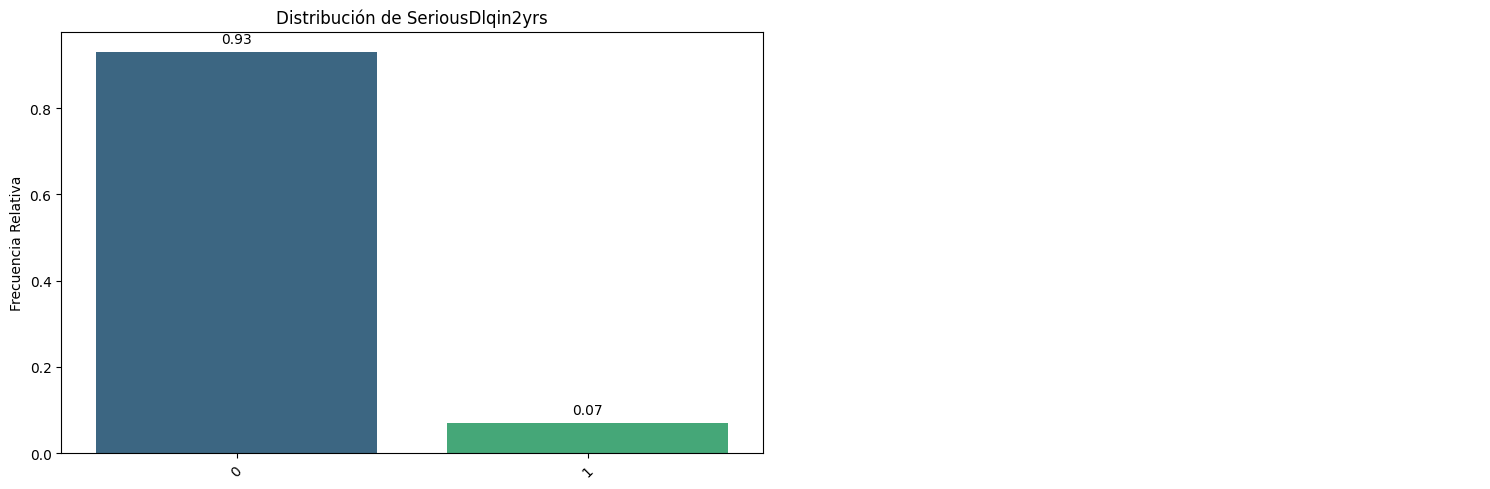

In [161]:
pinta_distribucion_categoricas(train_set, [target], relativa=True, mostrar_valores=True)

*Se puede ver claramente un desbalanceo siendo la clase prioritaria el **0**, donde las personas **NO** incumplen en el pago de las deudad en los últimos dos años*.

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

________________________________________________________________________________________

Antes de realizar el modelado, vamos a tratar las **Features**, limpiando sus datos y  viendo la relación que tienen con la **Target**

#### Limpieza de **Features**

In [162]:
# Primero vemos la distribución de 'MonthlyIncome'
train_set['MonthlyIncome'].value_counts(dropna=False)

MonthlyIncome
NaN        583
5000.0     236
4000.0     163
6000.0     154
3000.0     143
          ... 
7716.0       1
3176.0       1
13248.0      1
9657.0       1
4701.0       1
Name: count, Length: 3528, dtype: int64

In [163]:
# Analizo qué impacto puede haber si elimino las filas de nulos pero veo que hay de las dos clases.
train_set.loc[train_set['MonthlyIncome'].isnull()]['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    555
1     28
Name: count, dtype: int64

In [164]:
# Veo la distribución absoluta de la target
train_set['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    9329
1     700
Name: count, dtype: int64

In [165]:
# Como son pocos valores de las clases los que coinciden con los nulos de 'MonthlyIncome', elimino las filas que contengan los nulos de esta variable
train_set.dropna(subset=['MonthlyIncome'], inplace=True)

In [166]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9446 entries, 3552 to 3392
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      9446 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  9446 non-null   float64
 2   age                                   9446 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  9446 non-null   int64  
 4   DebtRatio                             9446 non-null   float64
 5   MonthlyIncome                         9446 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       9446 non-null   int64  
 7   NumberOfTimes90DaysLate               9446 non-null   int64  
 8   NumberRealEstateLoansOrLines          9446 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  9446 non-null   int64  
 10  NumberOfDependents                    9446 non-null   float64
dtypes: float64(4), int6

In [167]:
# Hago lo mismo en el dataset de Test
test_set.dropna(subset=['MonthlyIncome'], inplace=True)

In [168]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2370 entries, 7815 to 4466
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      2370 non-null   int64  
 1   RevolvingUtilizationOfUnsecuredLines  2370 non-null   float64
 2   age                                   2370 non-null   int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  2370 non-null   int64  
 4   DebtRatio                             2370 non-null   float64
 5   MonthlyIncome                         2370 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       2370 non-null   int64  
 7   NumberOfTimes90DaysLate               2370 non-null   int64  
 8   NumberRealEstateLoansOrLines          2370 non-null   int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  2370 non-null   int64  
 10  NumberOfDependents                    2370 non-null   float64
dtypes: float64(4), int6

#### Análisis de **Features** con la **Target**

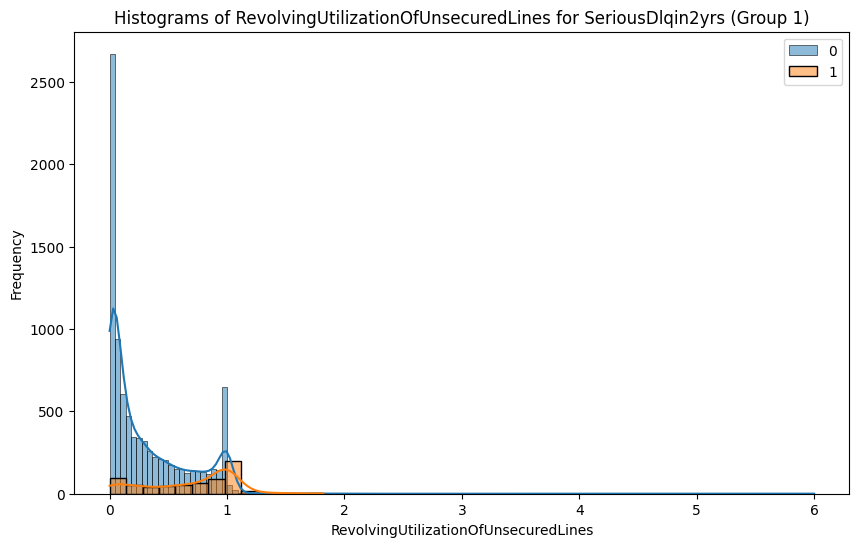

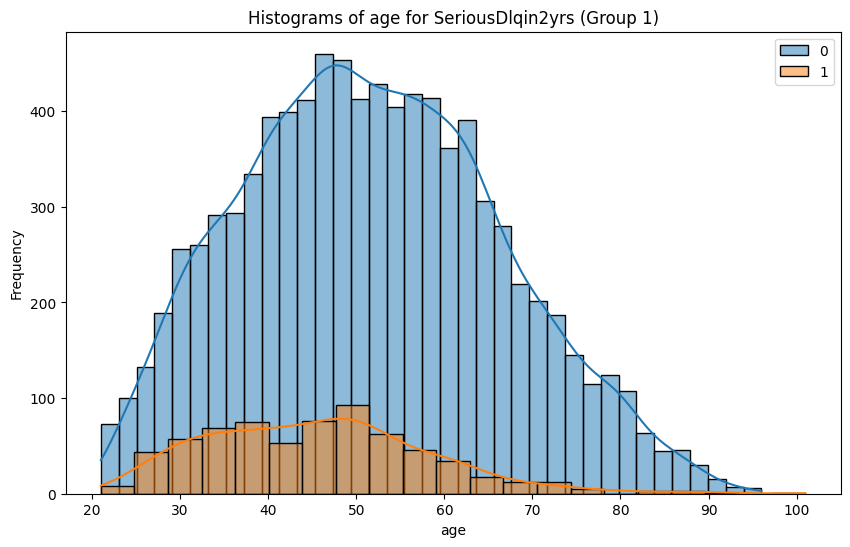

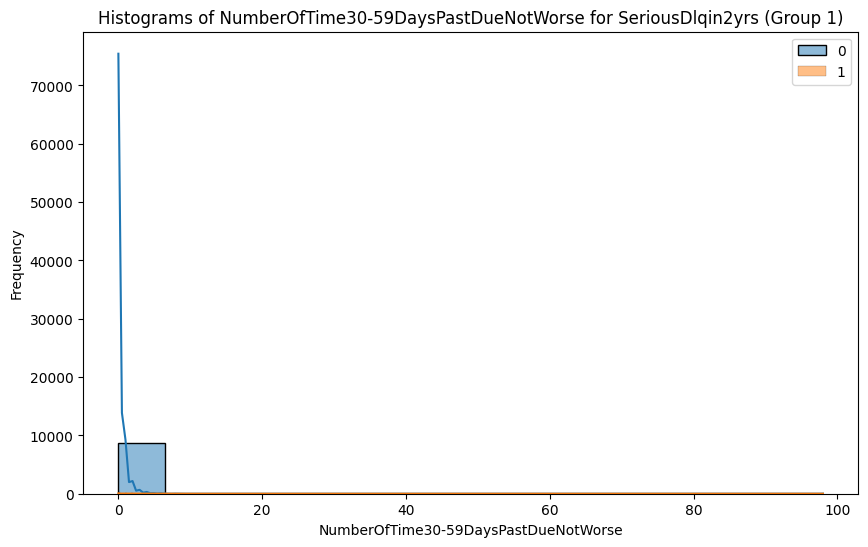

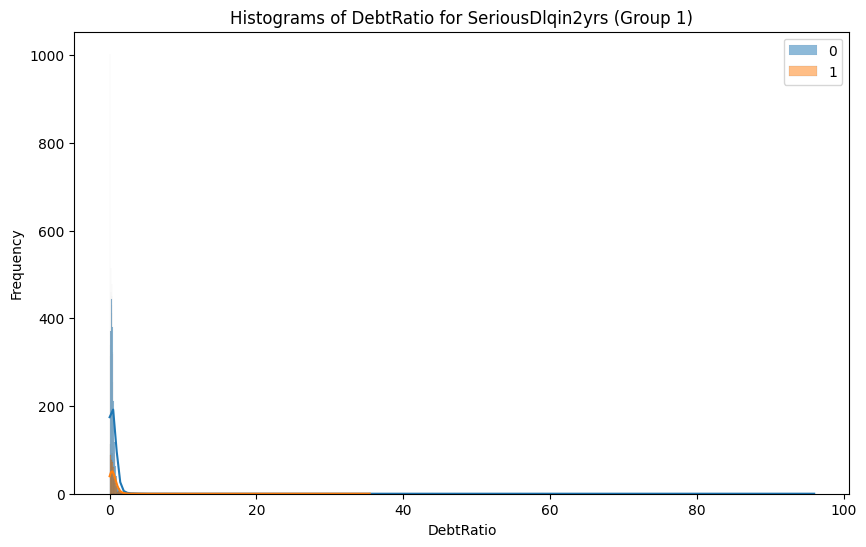

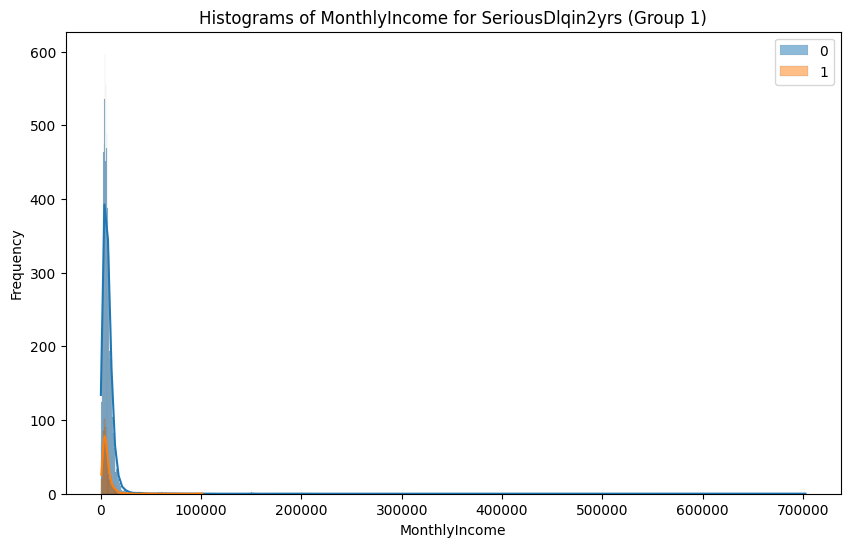

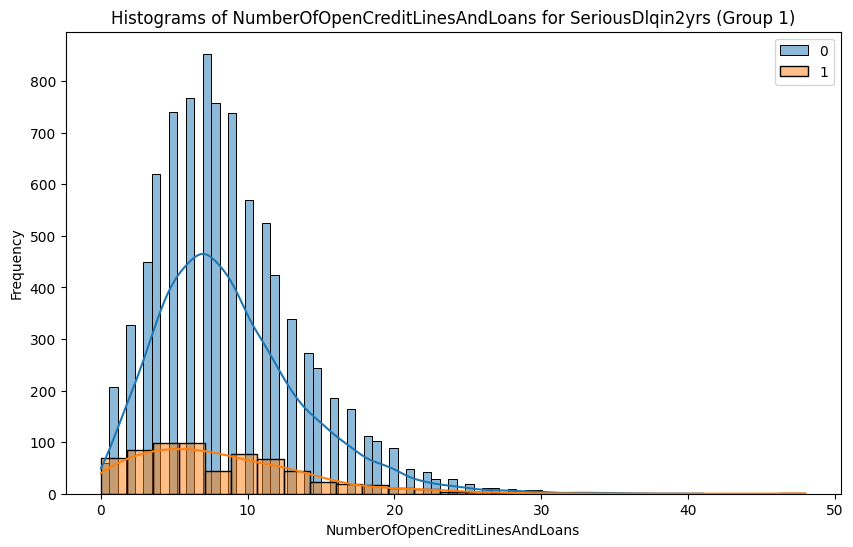

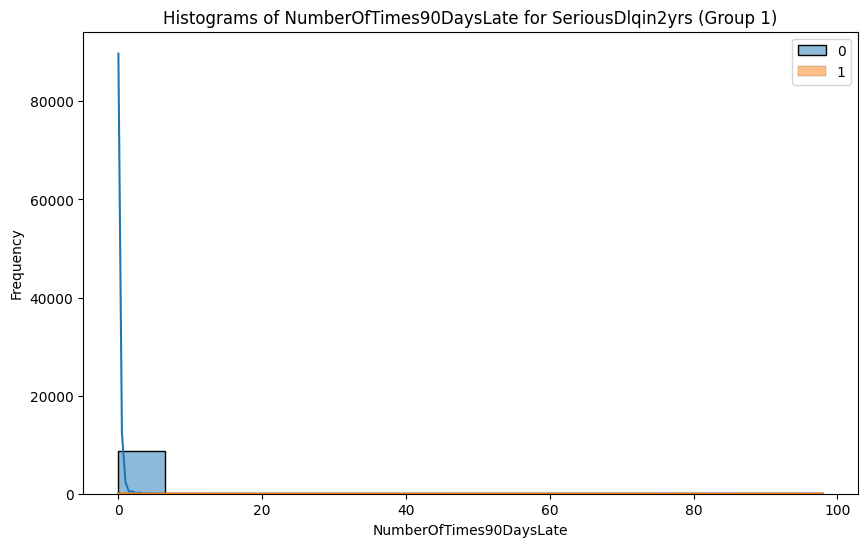

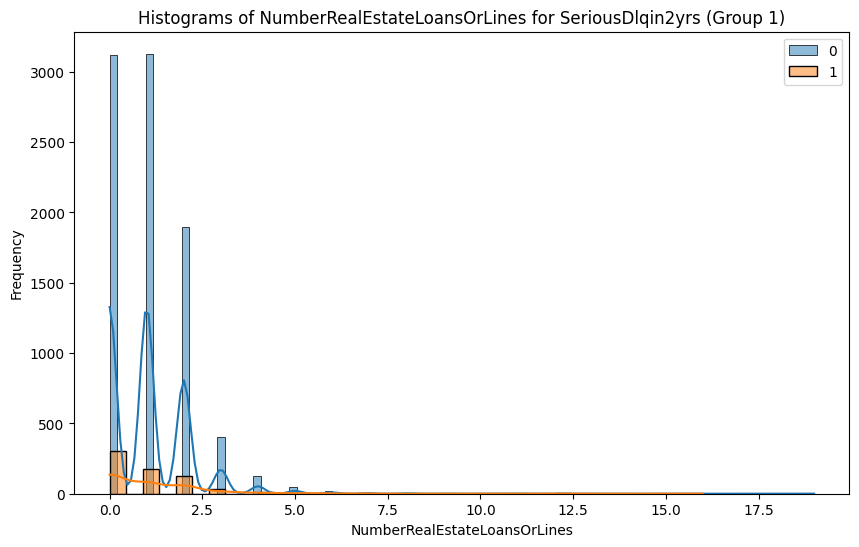

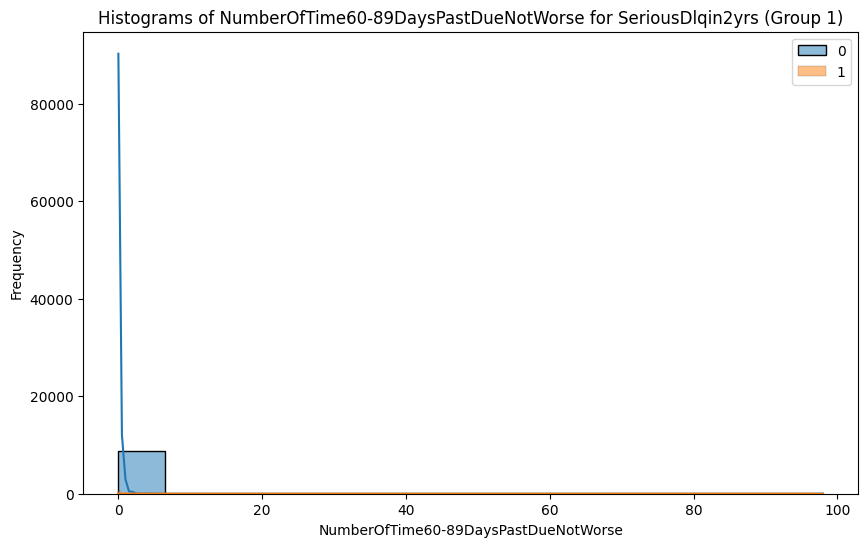

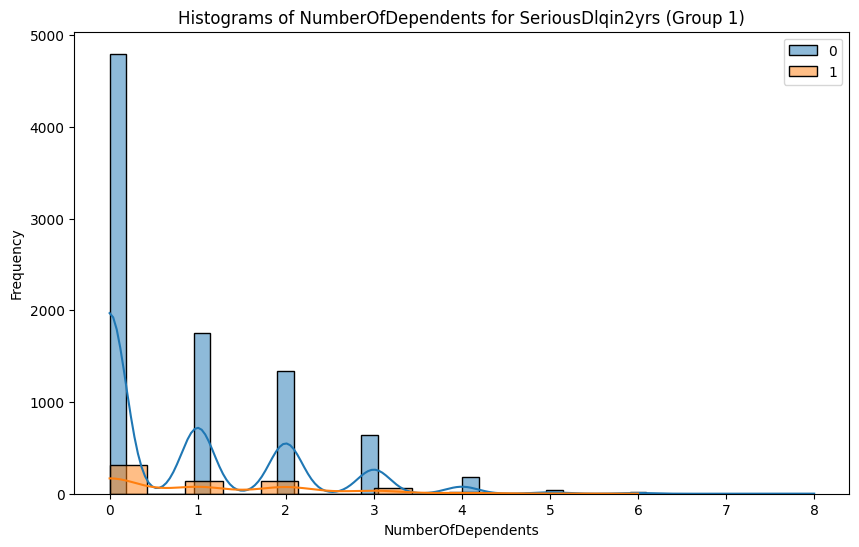

In [169]:
for col in features:
    plot_grouped_histograms(train_set, target, col, group_size=2)

*En este análisis no veo nada significativo en cuestión con la relación con la **Target**, excepto:*

- *`RevolvingUtilizationOfUnsecuredLines`, donde la clase 1 sobresale un poco de la clase 0*
- *`NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTimes90DaysLate` y `NumberOfTime60-89DaysPastDueNotWorse` donde la clase 1 se alarga más hacia la derecha con respecto a la clase 0*
- *`NumberOfOpenCreditLinesAndLoans`, `NumberRealEstateLoansOrLines` y `NumberOfDependents` sí hay cortes de diferencia entre ambas clases.*

*Voy a analizar la correlación y la significancia con la variable `age`*

In [170]:
train_set['age'].corr(train_set[target])

-0.10927512010096037

In [171]:
# Ahora vemos la significancia de la variable 'age con la target mediante chi-cuadrado
continencia = pd.crosstab(train_set['age'], train_set[target])
_, p_value, _, _ = chi2_contingency(continencia)

print('Pvalue --> ', p_value)

Pvalue -->  5.823244869739354e-14


*Vemos que sí tiene significancia con la **Target**, por lo que usaremos todas las **Features** que tenemos disponibles para hacer el modelado*.

#### Escalando y transformando las **Features**

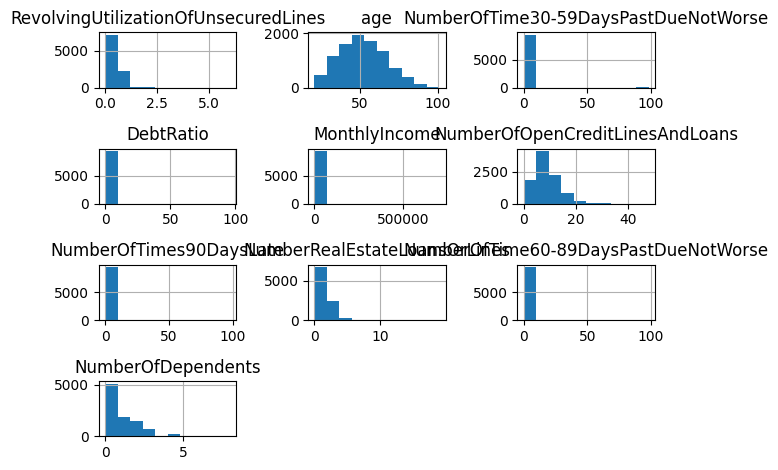

In [172]:
# Vemos primero sus histogramas

train_set[features].hist()
plt.tight_layout()

*Viendo estos histogramas, la única variable que no se necesita hacer una transformación logarítmica es `age`. Sin embargo, como muchas variables contienen el valor 0, puede causar un problema a la hora de tranformarlas logarítmicamente, por lo que únicamente realizaremos un estadarizado de todas las varibles*

In [173]:
scaler = StandardScaler()

train_set[features] = scaler.fit_transform(train_set[features])
test_set[features] = scaler.transform(test_set[features])

train_set[features].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,9.446000e+03,9.446000e+03,9.446000e+03,9.446000e+03,9.446000e+03,9.446000e+03,9.446000e+03,9.446000e+03,9.446000e+03,9.446000e+03
mean,1.068146e-16,-2.019699e-16,-1.053102e-17,-1.767706e-17,2.463506e-17,-5.679227e-17,1.579652e-17,1.974566e-17,-1.955760e-17,-5.265508e-18
std,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00
min,-9.110287e-01,-2.084072e+00,-1.190018e-01,-1.787368e-01,-5.359546e-01,-1.714709e+00,-6.172812e-02,-9.167466e-01,-5.219772e-02,-7.508408e-01
25%,-8.169096e-01,-7.787431e-01,-1.190018e-01,-1.291468e-01,-2.632988e-01,-7.343830e-01,-6.172812e-02,-9.167466e-01,-5.219772e-02,-7.508408e-01
50%,-4.308455e-01,-2.302657e-02,-1.190018e-01,-7.570506e-02,-1.139489e-01,-1.461875e-01,-6.172812e-02,-4.731002e-02,-5.219772e-02,-7.508408e-01
75%,6.694407e-01,6.639885e-01,-1.190018e-01,-1.181279e-02,1.100663e-01,4.420080e-01,-6.172812e-02,8.221266e-01,-5.219772e-02,1.000163e+00
max,1.552252e+01,3.412049e+00,3.549721e+01,3.356927e+01,5.420167e+01,7.696419e+00,3.608136e+01,1.560255e+01,3.641561e+01,6.253175e+00


#### Modelado

*Para realizar el modelado, voy a utilizar **KNN**, **Árbol de Decisión** y **SVC**. Averiguaré cuál es el mejor modelo teniendo en cuenta la importancia de la métrica **recall***

In [175]:
# Creo Xy

X_train = train_set[features]
y_train = train_set[target]

X_test = test_set[features]
y_test = test_set[target]

##### Entrenamiento sin ajustar hiperparámetros

In [176]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [185]:
pred_knn = knn.predict(X_test)

report_knn = classification_report(y_test, pred_knn)

print(report_knn)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2212
           1       0.57      0.13      0.21       158

    accuracy                           0.94      2370
   macro avg       0.76      0.56      0.59      2370
weighted avg       0.92      0.94      0.92      2370



In [180]:
# DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [186]:
pred_tree = tree.predict(X_test)
report_tree = classification_report(y_test, pred_tree)
print(report_tree)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2212
           1       0.25      0.30      0.27       158

    accuracy                           0.89      2370
   macro avg       0.60      0.62      0.61      2370
weighted avg       0.90      0.89      0.90      2370



In [182]:
# SVC
svc = SVC()
svc.fit(X_train, y_train)


SVC()

In [187]:
pred_svc = svc.predict(X_test)
report_svc = classification_report(y_test, pred_svc)
print(report_svc)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2212
           1       0.84      0.10      0.18       158

    accuracy                           0.94      2370
   macro avg       0.89      0.55      0.57      2370
weighted avg       0.93      0.94      0.92      2370



*Dan muy malos resultados pero quería ver la diferencia entre ajustar los hiperparámetros y no poner nada*

##### Ajustando con Cross Validation

*Investigando, para que las clases puedan tener un equilibrio entre las dos, se puede usar la clase `StratifiedKFold()` para ajustar el hiperparámetro `cv` de `cross_val_score` y balancear así las clases.*

In [192]:
# KNN
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # shuffle a True ya que "baraja" los datos evitando sesgos
cv_knn = cross_val_score(knn, X_train, y_train, cv=cv, scoring='recall_macro')
metricas_cv = {}
metricas_cv['cv_knn'] = cv_knn

In [194]:
#DecisionTreeClassifier

cv_tree = cross_val_score(tree, X_train, y_train, cv=cv, scoring='recall_macro')
metricas_cv['cv_tree'] = cv_tree
metricas_cv

{'cv_knn': array([0.54358974, 0.58268699, 0.57092316, 0.55773483, 0.56694962]),
 'cv_tree': array([0.58831909, 0.58863375, 0.61999192, 0.61102181, 0.61394273])}

In [195]:
# SVC

cv_svc = cross_val_score(svc, X_train, y_train, cv=cv, scoring='recall_macro')
metricas_cv['cv_svc'] = cv_svc
metricas_cv

{'cv_knn': array([0.54358974, 0.58268699, 0.57092316, 0.55773483, 0.56694962]),
 'cv_tree': array([0.58831909, 0.58863375, 0.61999192, 0.61102181, 0.61394273]),
 'cv_svc': array([0.52877493, 0.52928095, 0.5261194 , 0.52124846, 0.54301913])}

In [196]:
# Busco cual es el mejor modelo
# Calculo las medias del recall macro para cada modelo
mean_knn = metricas_cv['cv_knn'].mean()
mean_tree = metricas_cv['cv_tree'].mean()
mean_svc = metricas_cv['cv_svc'].mean()

print(f"Media del recall macro para KNN: {mean_knn}")
print(f"Media del recall macro para Decision Tree: {mean_tree}")
print(f"Media del recall macro para SVC: {mean_svc}")

Media del recall macro para KNN: 0.5643768691747725
Media del recall macro para Decision Tree: 0.6043818622875448
Media del recall macro para SVC: 0.529688573379242


In [197]:
# Comparo los valores y determinar el mejor modelo
mejor_modelo = max([('KNN', mean_knn), ('Tree', mean_tree), ('SVC', mean_svc)])
mejor_modelo

('Tree', 0.6043818622875448)

##### Optimización de hiperparámetros del mejor modelo: **DecisionTreeClassifier**

In [199]:
params_grid = {
    'max_depth': np.arange(1,20,1),
    'min_samples_split': np.arange(100,500,100),
    'min_samples_leaf': np.arange(10,100,5),
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', None]
}

tree_grid = GridSearchCV(tree, cv=cv, param_grid=params_grid, scoring = 'recall_macro')

tree_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95]),
                         'min_samples_split': array([100, 200, 300, 400])},
             scoring='recall_macro')

In [205]:
print('Los mejores parámetros son:', tree_grid.best_params_)

Los mejores parámetros son: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 90, 'min_samples_split': 100}


In [206]:
print('La mejor puntuación es:', tree_grid.best_score_)

La mejor puntuación es: 0.7578731472984268


In [210]:
# Hago predicción sobre los valores reales
pred_tree_grid = tree_grid.predict(X_test)

In [211]:
# Visualizo el informe de clasificación
print(classification_report(y_test, pred_tree_grid))

              precision    recall  f1-score   support

           0       0.98      0.63      0.77      2212
           1       0.14      0.85      0.24       158

    accuracy                           0.65      2370
   macro avg       0.56      0.74      0.51      2370
weighted avg       0.93      0.65      0.73      2370



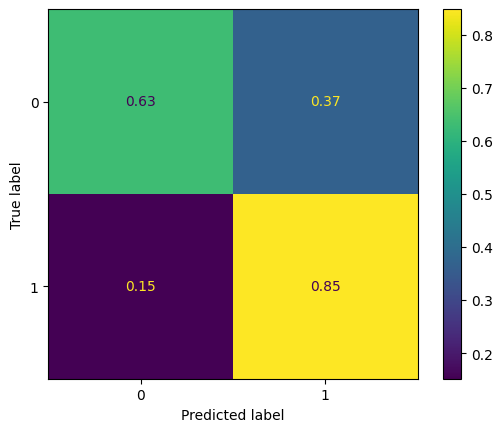

In [212]:
# Observo la Matriz de Confusión sobre recall
ConfusionMatrixDisplay.from_predictions(y_test, pred_tree_grid, normalize='true')

***ANÁLISIS DE ERRORES***

El problema de negocio es predecir quién tendrá dificultades financieras en los próximos dos años, siendo 0 los que NO tendrán dificultades y 1 los que SÍ:

- Predecimos a un 85% las personas que sí van a encontrar dificultades, procentaje muy elevado frente al 37% que creemos que van a tener dificultades pero al final no lo tienen.
- Como consecuencia, las predicciones sobre los que no van a encontrar dificultades baja siendo un 63% de los que sí que hemos acertado en que no van a encontrar dificultades con un 15% de los que dijimos que no lo iban a tener pero al final sí.

En este caso, lo importante era predecir quién SÍ va a tener dificultades y acertamos al 85%, cifra, a mí parecer, muy buena